## 깐부치킨 지점별 매출 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Data Load
receipt = pd.read_csv("../resources/extractedData/깐부치킨_거래데이터.csv", encoding="utf8")

In [2]:
# 데이터 확인
receipt

,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
0,S23991,깐부치킨(강남구청역1번출구점),20190204,14,20190204201731,포장1,18000,MAIN MENU,고추간장,2118,1,18000
1,S23991,깐부치킨(강남구청역1번출구점),20190203,3,20190203191830,포장1,18000,MAIN MENU,고추간장,2118,1,18000
2,S23991,깐부치킨(강남구청역1번출구점),20190202,8,20190202191158,7,18000,MAIN MENU,고추간장,2118,1,18000
3,S23991,깐부치킨(강남구청역1번출구점),20190201,22,20190201214234,7,18000,MAIN MENU,고추간장,2118,1,18000
4,S23991,깐부치킨(강남구청역1번출구점),20190203,8,20190203204417,6,18000,MAIN MENU,고추간장,2118,1,18000
...,...,...,...,...,...,...,...,...,...,...,...,...
83582,U06529,깐부치킨(역삼초교점),20190228,20,20190301002504,테이블-9,11000,주류,카스(병),3355,2,5500
83583,U06529,깐부치킨(역삼초교점),20190211,1,20190211190925,테이블-5,6000,주류,클라우드,1286,1,6000
83584,U06529,깐부치킨(역삼초교점),20190213,4,20190213193435,테이블-3,36000,주류,클라우드,1286,6,6000
83585,U06529,깐부치킨(역삼초교점),20190219,6,20190219212814,테이블-1,6000,주류,클라우드,1286,1,6000


In [4]:
receipt["매장명"].unique()

array(['깐부치킨(강남구청역1번출구점)', '깐부치킨(수서역점)', '깐부치킨(역삼럭키점)', '깐부치킨(은마아파트점)',
       '깐부치킨(논현역점)', '깐부치킨(삼성점)', '깐부치킨(청담자이점)', '깐부치킨(학동역점)',
       '깐부치킨(선릉역1번출구점)', '깐부치킨(삼성1동점)', '깐부치킨(삼성역점)', '깐부치킨(선릉역점)',
       '깐부치킨(강남역플래티넘점)', '깐부치킨(개포점)', '깐부치킨(압구정현대백화점)', '깐부치킨(강남세브란스점)',
       '깐부치킨 대치역점', '깐부치킨(청담1호점)', '깐부치킨(일원점)', '깐부치킨(대치사거리점)',
       '깐부치킨(역삼GS타워점)', '깐부치킨(선정릉역점)', '(주)깐부 청담본점', '깐부치킨(역삼디오빌점)',
       '깐부치킨(강남구청역3번출구점)', '(주)깐부치킨(세곡점)', '깐부치킨 역삼본점', '깐부치킨(신사역점)',
       '깐부치킨(압구정한강고수부지)', '깐부치킨 신사가로수점', '깐부치킨(한티점)', '깐부치킨(도산사거리점)',
       '깐부치킨(역삼초교점)'], dtype=object)

In [41]:
# 매장코드 33개 확인, 매장코드 dict 선언
store_code = dict(set(receipt[["매장코드","매장명"]].itertuples(index=False)))
sale = dict()

# 각 매장별 월별 sale 집계
for store_code in store_code.keys():
    sale[store_code] = sum(receipt[receipt["매장코드"]==store_code]["판매단가"] * receipt[receipt["매장코드"]==store_code]["판매수량"])

print(sale)    

{'S23992': 31373000, 'S24077': 39171000, 'S35539': 41466500, 'T06644': 79926000, 'T18671': 36641500, 'T74630': 57980000, 'T78908': 6906000, 'S24101': 49894000, 'S24036': 19153500, 'S37219': 55398000, 'S95349': 50330500, 'T46063': 46406500, 'S24088': 47290500, 'T79908': 52728000, 'T50791': 12642500, 'T88625': 11746000, 'S48814': 14722500, 'S31130': 53636100, 'S41446': 19802500, 'S56417': 31402200, 'T00602': 65312000, 'S70964': 35203400, 'S36322': 45855000, 'T86552': 21857500, 'U06529': 14325500, 'T53532': 40543500, 'S24023': 38272500, 'S23991': 26125000, 'S24004': 15152000, 'S36329': 54300000, 'S54785': 27573800, 'S42681': 45593000, 'S49287': 52430000}


In [84]:
store_code

'S49287'

<Figure size 720x432 with 0 Axes>

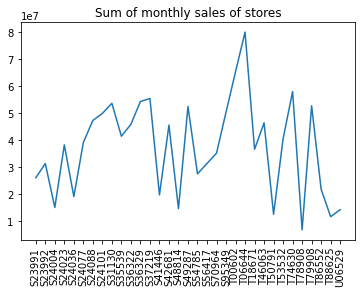

<Figure size 720x432 with 0 Axes>

In [60]:
# 월별 지출 plot찍기
myList = sale.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.plot(x, y)
plt.title("Sum of monthly sales of stores")
plt.xticks(rotation = 90)
plt.figure(figsize = (10,6))

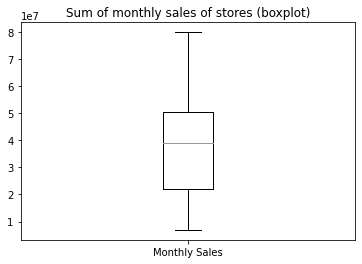

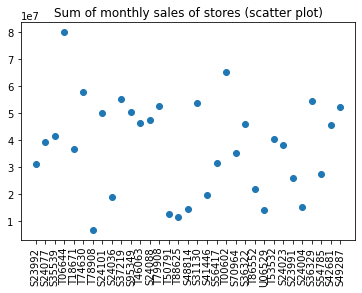

In [82]:
## 월별 매출로 상,중,하 그룹으로 나누기
# boxplot
plt.boxplot(sale.values(), sym="bo")
plt.xticks([1],["Monthly Sales"])
plt.title("Sum of monthly sales of stores (boxplot)")
plt.show()

# scatter
plt.scatter(sale.keys(), sale.values())
plt.xticks(rotation=90)
plt.title("Sum of monthly sales of stores (scatter plot)")
plt.show()

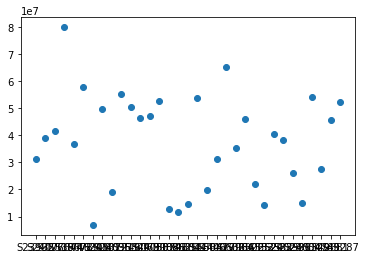

In [78]:
# clustering으로 군집으로 만들기
